#01-EXPLORACION Y PREPARACION DE DATASET.
Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa principal de muerte a nivel mundial, siendo responsable de aproximadamente el 11% de las muertes totales. Este conjunto de datos ofrece atributos de un grupo de pacientes, lo que nos permite identificar patrones para el modelado. Se exploran factores como género, edad, diversas enfermedades y hábito de fumar para analizar la probabilidad de que un paciente sufra un derrame cerebral. Cada fila en los datos proporciona información relevante sobre el paciente.
- 1 id: identificador único
- 2 gender: "Masculino", "Femenino" u "Otro"
- 3 age: edad del paciente
- 4 hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
- 5 heart_disease: 0 si el paciente no tiene enfermedades cardíacas, 1 si el paciente tiene una enfermedad cardíaca
- 6 ever_married: "No" o "Sí"
- 7 work_type: "Niños", "Trabajo gubernamental", "Nunca trabajó", "Privado" o "Autónomo"
- 8 Residence_type: "Rural" o "Urbano"
- 9 avg_glucose_level: nivel promedio de glucosa en sangre
- 10 bmi: índice de masa corporal
- 11 smoking_status: "Exfumador", "Nunca fumó", "Fuma" o "Desconocido"*
- 12 stroke: 1 si el paciente tuvo un derrame cerebral o 0 si no lo tuvo

## EXPLORACION

In [1]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer

In [2]:
# Extraemos csv desde drive.
file_id = "1BWxZhkFTQ7IVQt9WSvJDQ2VKn65vhstp"
download_link = f"https://drive.google.com/uc?id={file_id}"
response = requests.get(download_link)
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data, encoding='utf-8')


In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df1=df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


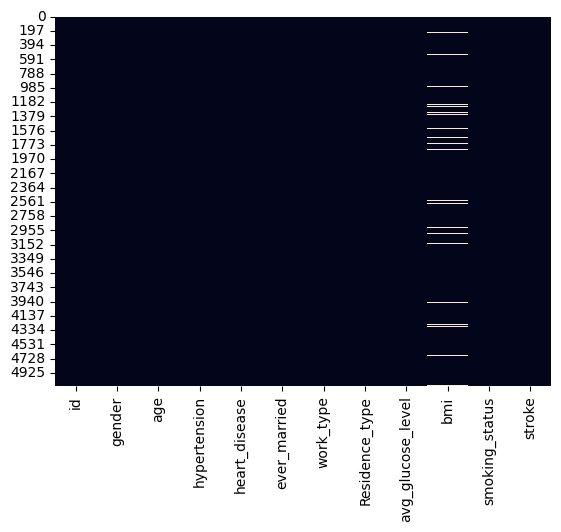

In [ ]:
# Comprobamos presencia de datos nulos.
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
# Estamos en presencia de 201 datos nulos.
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Tomamos la desicion de eliminar las filas con valores nulos.
df.dropna(inplace=True)

In [8]:
# Verificamos dimension del dataframe
df.shape

(4909, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


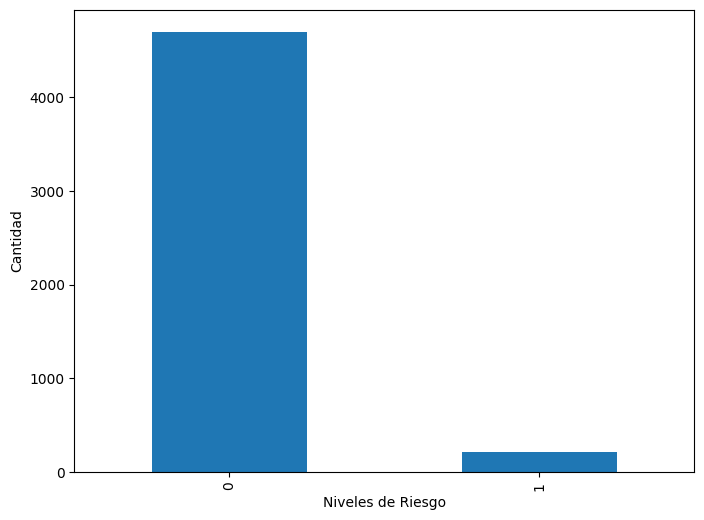

In [ ]:
# Graficamos variable target STROKE, para observar comportamiento.
counts = df['stroke'].value_counts()
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.xlabel('Niveles de Riesgo')
plt.ylabel('Cantidad')
plt.show()

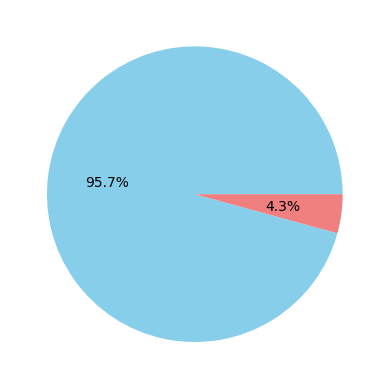

In [ ]:
# Analizamos la proporcionalidad mediante grafica de torta
conversion_counts = df['stroke'].value_counts()
plt.pie(conversion_counts, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.show()

In [ ]:
# Analisis descriptivo de las variables categoricas
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


<ipython-input-16-d5c79d072d8a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df.corr().round(2)


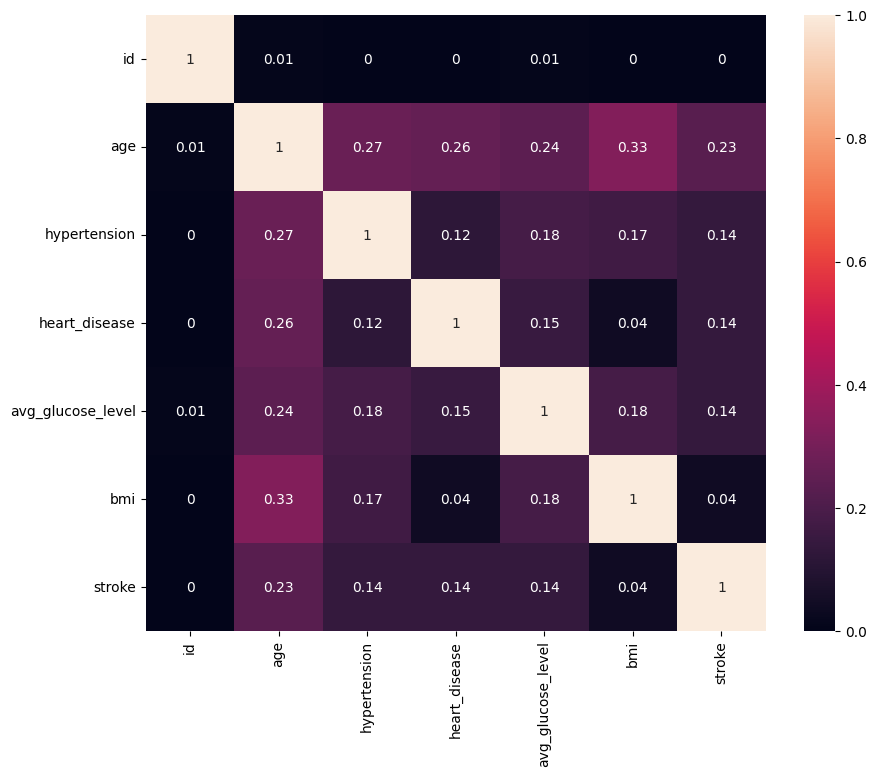

In [ ]:
# Observamos las correlacion entre las variables, cada una.
plt.figure(figsize=(10, 8))
matriz = df.corr().round(2)
sns.heatmap(data=matriz, annot=True)
plt.show()

## PREPARACION DE DATASET

In [ ]:
#Procedemos verificar si se pueden transformar la mayoria de las columnas de tipo objet a int64.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [9]:
# Vemos la cantidad de datos unicos que posee cada variable.
df.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [10]:
# eliminamos a esa persona que no tiene sexo.
df = df[df['gender'] != 'Other']

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
# Vectorizamos las variables categoricas para transformavaras en variables cuantitativas.
df=pd.get_dummies(df,drop_first=True)

In [12]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0


In [13]:
# Escalamos las variables cuantitativas para poder todas en misma dimension.

columns_to_normalize = ['age', 'avg_glucose_level', 'bmi']
df_subset = df[columns_to_normalize]

scaler = Normalizer()
df[columns_to_normalize] = scaler.fit_transform(df_subset)

In [ ]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.277897,0,1,0.948540,0.151806,1,1,1,0,1,0,0,1,1,0,0
2,31112,0.585405,0,1,0.775076,0.237821,1,1,1,0,1,0,0,0,0,1,0
3,60182,0.270129,0,0,0.943963,0.189642,1,0,1,0,1,0,0,1,0,0,1
4,1665,0.409955,1,0,0.903563,0.124543,1,0,1,0,0,1,0,0,0,1,0
5,56669,0.394882,0,0,0.907789,0.141377,1,1,1,0,1,0,0,1,1,0,0


In [14]:
df_origin= df.copy()

#02-MODELADO
Creamos y comparamos modelos con :
- 11 variables
- 6 variables
Y finalmente con SFS y ciclo FOR determinamos las curva de test y train, para encontrar el punto de equilibro entre over y under.

In [ ]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [ ]:
# Definimos trains y tests.
X= df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Male', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]
y= df['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Aplicamos modelo KNN (Se procedio a elegir este modelo, ya que la consigna y el set esta pensado para una resolucion binaria, osea grupo de personas que tienen riesgo,y el otro grupo de personas que no tienen riesgo.)

# Entrenamos y evaluamos con set train
modelo = KNeighborsClassifier() # Dejamos el k=5, preestablecido por el metodo.
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_train)
accuracy_score(y_train, y_pred)

0.9581635425156207

In [ ]:
m1=KNeighborsClassifier()

In [ ]:
# Aplicamos croos para estimar la presicion con la que se puede llegar en test .
cross_val_score(m1,X_train,y_train,cv=5).mean()

0.9540889917998939

In [ ]:
# Evaluamos rendimiento de model con test.
y_pred1=modelo.predict(X_test)
accuracy_score(y_test, y_pred1)

0.9470252648736757

## CREACION DE MODELO CON 6 VARIALES

In [ ]:
# Usamos SFS, para elegir las 6 mejores variables entre las 12.
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(KNeighborsClassifier(),k_features=6,forward=False)

In [ ]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), forward=False,
                          k_features=(6, 6), scoring='accuracy')

In [ ]:

sfs.k_feature_names_

('hypertension',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Self-employed',
 'smoking_status_formerly smoked')

In [ ]:
X= df[['hypertension',
 'bmi',
 'ever_married_Yes',
 'work_type_Private',
 'Residence_type_Urban',
 'smoking_status_smokes']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Creamos,entrenamos y evaluamos  modelo con train.
modelo = KNeighborsClassifier()# Dejamos el k=5
modelo.fit(X_train,y_train)#
y_pred=modelo.predict(X_train)
accuracy_score(y_train, y_pred)

0.9562618853572399

In [ ]:
# Aplicamos croos para estimar la presicion con la que se puede llegar en test .
m2=KNeighborsClassifier()
cross_val_score(m2,X_train,y_train,cv=5).mean()

0.9540893605097045

In [ ]:
# Evaluamos rendimiento de model con test.
y_pred1=modelo.predict(X_test)
accuracy_score(y_test, y_pred1)

0.960880195599022

## CREACION DE MODELOS, USANDO "FOR"

In [ ]:
X= df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Male', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]

In [ ]:
# Recurrimos al for para, recorrer del 1 a 12 viariables del dataframe, y de elegir las mejores combinaciones de cada una.
best_feature_sets = []
X_train, X_test, y_train, y_test = train_test_split(X, y)

for num_features in range(1, 13):
    # SFS
    sfs = SFS(KNeighborsClassifier(), k_features=num_features, forward=False)
    sfs.fit(X_train, y_train)
    selected_feature_names = sfs.k_feature_names_
    best_feature_sets.append(selected_feature_names)
    print(f"Mejores {num_features} características seleccionadas: {selected_feature_names}")

Mejores 1 características seleccionadas: ('work_type_Private',)
Mejores 2 características seleccionadas: ('work_type_Private', 'smoking_status_formerly smoked')
Mejores 3 características seleccionadas: ('hypertension', 'work_type_Private', 'smoking_status_formerly smoked')
Mejores 4 características seleccionadas: ('hypertension', 'gender_Male', 'work_type_Private', 'smoking_status_formerly smoked')
Mejores 5 características seleccionadas: ('hypertension', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'smoking_status_formerly smoked')
Mejores 6 características seleccionadas: ('hypertension', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'smoking_status_formerly smoked')
Mejores 7 características seleccionadas: ('hypertension', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed', 'smoking_status_formerly smoked')
Mejores 8 características seleccionadas: ('hypertension', 'heart_disease', 'bmi', 'gender_Male', 'ever_married_Ye

In [ ]:
# Entrenamos cada uno de los resultados anteriores, y obtenemos el accuracy Train y accuracy Test.

for feature_set in best_feature_sets:
    # Recorremos las variables de X_train
    X_selected = X_train[list(feature_set)]
    # Crea modelo KNN
    modelo = KNeighborsClassifier()
    modelo.fit(X_selected, y_train)

    # prediccion en entrenamiento
    y_pred_train = modelo.predict(X_selected)

    # Accuracy en entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # recorremos las variables de X_test
    X_test_selected = X_test[list(feature_set)]

    # rredicciones  conjunto de prueba
    y_pred_test = modelo.predict(X_test_selected)
    # Accuracy en test
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Características: {feature_set}")
    print(f"Train Accuracy: {train_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")

Características: ('work_type_Private',)
Train Accuracy: 0.957
Test Accuracy: 0.958
Características: ('work_type_Private', 'smoking_status_formerly smoked')
Train Accuracy: 0.957
Test Accuracy: 0.958
Características: ('hypertension', 'work_type_Private', 'smoking_status_formerly smoked')
Train Accuracy: 0.957
Test Accuracy: 0.958
Características: ('hypertension', 'gender_Male', 'work_type_Private', 'smoking_status_formerly smoked')
Train Accuracy: 0.957
Test Accuracy: 0.958
Características: ('hypertension', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'smoking_status_formerly smoked')
Train Accuracy: 0.957
Test Accuracy: 0.958
Características: ('hypertension', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'smoking_status_formerly smoked')
Train Accuracy: 0.957
Test Accuracy: 0.958
Características: ('hypertension', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed', 'smoking_status_formerly smoked')
Train Accuracy: 0.957
T

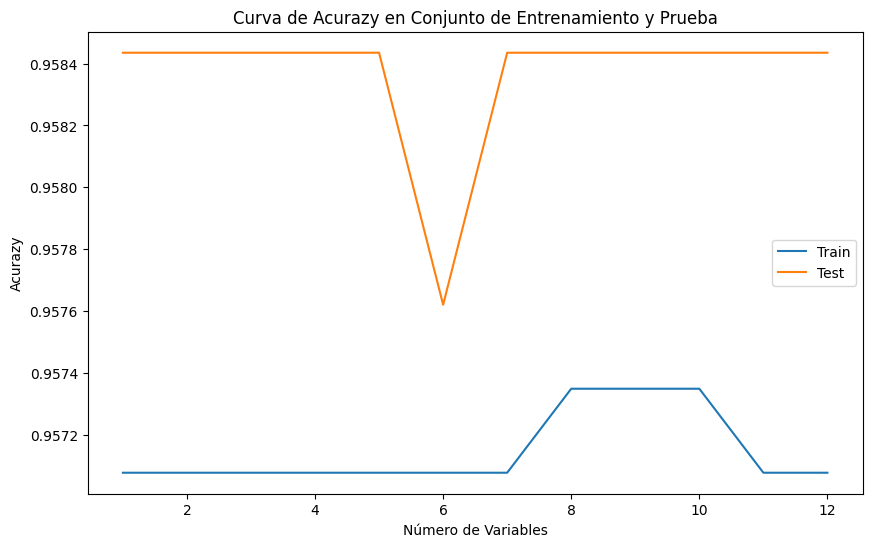

In [ ]:
# Graficamos la curva train y la curva test, para obtener punto de equilibrio entre OVER y UNDER

train_accuracies = []
test_accuracies = []
for feature_set in best_feature_sets:
    X_selected = X_train[list(feature_set)]

    #   knn
    modelo = KNeighborsClassifier()
    modelo.fit(X_selected, y_train)

    #   predicciones entrenamiento
    y_pred_train = modelo.predict(X_selected)

    #precisión entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)

    # Selecciona las características correspondientes en el conjunto de prueba
    X_test_selected = X_test[list(feature_set)]

    #  predicciones en  prueba
    y_pred_test = modelo.predict(X_test_selected)

    # Calcula la precisión en el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(best_feature_sets) + 1), train_accuracies, label='Train')
plt.plot(range(1, len(best_feature_sets) + 1), test_accuracies, label='Test')
plt.legend()
plt.title('Curva de Acurazy en Conjunto de Entrenamiento y Prueba')
plt.xlabel('Número de Variables')
plt.ylabel('Acurazy')
plt.show()

# 03-CONCLUSIONES
COCLUSION_01: El modeo optimo de quilibrio correspode al de 6 variables: 'hypertension', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'smoking_status_formerly smoked'


# 04-DATA WRAINING
Realizamos conjunto de procesos de transformacion de variables a : 'avg_glucose_level' y "ever_married" , y resignacion de variables "id" como index.

In [ ]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Creamos funcion para transformar variable float a cateogoricas:
def categorizar_glucosa(valor):
    if 50 < valor <= 130:
        return 'bajo'
    elif 130 < valor <= 200:
        return 'medio'
    elif 200 < valor <= 300:
        return 'alto'
    else:
        return 'fuera de rango'

In [ ]:
# Realizamos el apply sobre la columna deseada.
df1['categoria_glucosa'] = df['avg_glucose_level'].apply(categorizar_glucosa)

In [ ]:
# Definir la columna "id" como índice
df.set_index('id', inplace=True)

In [ ]:
# Creamos funcion para transformar categorico a int binario.
def convertir_a_binario(valor):
    if valor == 'Yes':
        return 1
    else:
        return 0

In [ ]:
# Realizamos el apply sobre la columna deseada.
df1["ever_married_binario"] = df1["ever_married"].apply(convertir_a_binario)

In [ ]:
# Guarda el DataFrame en un archivo CSV
df1.to_csv('nombre_del_archivo.csv', index=False)

In [ ]:
# Guarda el DataFrame en un archivo Xlsx
df1.to_excel('nombre_del_archivo.xlsx', index=False)

# 05-MODELO ARBOL DE CLASIFICACION Y BAYES
Tomamos las mejores variables obtendias del anterior modelo con el SFS, y procedemos a modelar con tree y bayes. Con el objetivo de compara resultados.

## MODELO DE ARBOL DE CLASIFICACION

In [15]:
df_origin.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.277897,0,1,0.948540,0.151806,1,1,1,0,1,0,0,1,1,0,0
2,31112,0.585405,0,1,0.775076,0.237821,1,1,1,0,1,0,0,0,0,1,0
3,60182,0.270129,0,0,0.943963,0.189642,1,0,1,0,1,0,0,1,0,0,1
4,1665,0.409955,1,0,0.903563,0.124543,1,0,1,0,0,1,0,0,0,1,0
5,56669,0.394882,0,0,0.907789,0.141377,1,1,1,0,1,0,0,1,1,0,0


In [ ]:
df_origin.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [ ]:
# Definimos trains (tomamos las mejores variables del anterior modelo obtenidas en el SFS ) y test.
X= df_origin[['hypertension', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'smoking_status_formerly smoked']]
y= df_origin['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Aplicamos herramienta GridSearch, para jugar con diferentes hiperparametros y obtener los mejores
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=42)
# Definimos rango de hipersparametros
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}
# Creamos
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# Entrenamos
grid_search.fit(X_train, y_train)
# Lista de los mejores hiperparametros, para obtener el resultado mas eficiente.
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

In [ ]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [ ]:
# Obersvamos le rendimiento con los datos de prueba.
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.9581635425156207

In [ ]:
# Aplicamos cross para estimar test.
from sklearn.model_selection import cross_val_score
m1=DecisionTreeClassifier()
cross_val_score(m1,X_train,y_train,cv=5).mean()

0.9157829921538554

In [ ]:
# Evaluamos el rendimiento con test
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9551752241238793

## MODELO NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Crear el bayess
classifier = GaussianNB()

# fiteamos
classifier.fit(X_train, y_train)

# hacemos la prediccion
y_train1 = classifier.predict(X_train)
y_test1 = classifier.predict(X_test)

# Obersvamos le rendimiento con los datos de prueba.
accuracy_train = metrics.accuracy_score(y_train, y_train1)
print(f"train:{accuracy_train}")

# Evaluamos el rendimiento con test
accuracy_test = metrics.accuracy_score(y_test, y_test1)
print(f"test:{accuracy_test}")


train:0.9051888073892964
test:0.8916055419722901


## COMCLUSION:
el modelo que nos esta entregando mejores resultados es  "decision tree" con un accurazy de 0,95 (este modelo tiene la particularidad que en relacion a "Bayes" manaje muchos hiperparametros).

# 06- MATRIZ DE CONFUCION

In [17]:
df_origin.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.277897,0,1,0.948540,0.151806,1,1,1,0,1,0,0,1,1,0,0
2,31112,0.585405,0,1,0.775076,0.237821,1,1,1,0,1,0,0,0,0,1,0
3,60182,0.270129,0,0,0.943963,0.189642,1,0,1,0,1,0,0,1,0,0,1
4,1665,0.409955,1,0,0.903563,0.124543,1,0,1,0,0,1,0,0,0,1,0
5,56669,0.394882,0,0,0.907789,0.141377,1,1,1,0,1,0,0,1,1,0,0


In [18]:
# Definimos trains (tomamos las mejores variables del anterior modelo obtenidas en el SFS ) y test.
X= df_origin[['hypertension', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'smoking_status_formerly smoked']]
y= df_origin['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

RECALL PARA MINIMIZAR FALSOS NEGATIVOS

In [24]:
from sklearn.metrics import recall_score

In [25]:
# IMPORTAMOS BIBLIOTECAS DE DISTINTOS MODELOS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Definimos modelos
model1=LogisticRegression()
model2=KNeighborsClassifier(3)
model3=KNeighborsClassifier(5)
model4=GaussianNB()
model5=DecisionTreeClassifier(max_leaf_nodes=10)
model6=DecisionTreeClassifier(max_leaf_nodes=20)

In [27]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model1, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model2, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model3, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model4, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model5, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model6, X_train, y_train, cv=3, scoring='recall').mean())

0.0
0.006410256410256411
0.006535947712418301
0.20160884866767223
0.006535947712418301
0.013071895424836602


CONCLUSION: el modelo con la mejor performance es el model4

In [28]:
# Fitiamos el mejor modelo
model4.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred=model4.predict(X_test)

In [30]:
recall_score(y_test,y_pred)

0.3090909090909091

In [31]:
#Importamos matriz de confuncion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

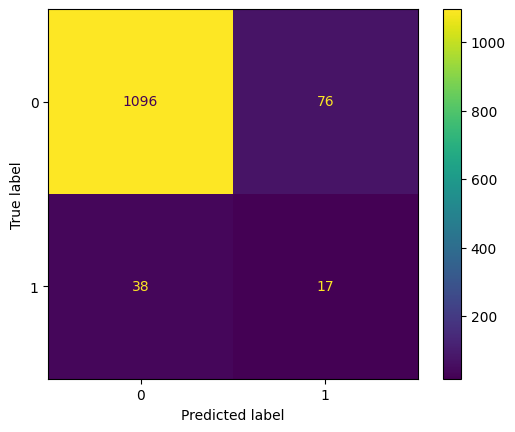

In [32]:
#Graficamos para determinar conclusiones
cm = confusion_matrix(y_test, y_pred, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=model4.classes_)
disp.plot()